
## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Classification, Clustering using scikit-learn</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Wednesday, October 3 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about what Machine Learning models are, how do they work, what criteria you choose to choose a model, how accuracy matters and how error is calculated and so on. We will be using scikit-learn to examine a Machine Learning model. 

In this Project, we are trying to analyze the data of absenteeism at work. There is one csv file in the dataset. We will analyse how different features influence the model. On what criteria features are chosen and how model are chosen for a certain task. 

The dataset description is given in the end of the document. Also, try to comment your code.

## What to Turn In:

This Jupyter notebook with answers to each Task namely - 
    <p> <b> Task 1 </b> - Reading data and splitting between train and test. </p>
    <p> <b> Task 2 </b> - PCA application for analyze different features. Three plots - bmi vs absenteeism, transportation expense vs absenteeism and age vs absenteeism. </p>
    <p> <b> Task 3 </b> - Machine Learning  Models training for to predict if a person will be absent given the features. </p>
    <p> <b> Task 4 </b> - Clustering task - cluster people in different groups of absent reasons. </p>

A reported description in each answer for the task in the notebook iteself which will include explanation for what features were correlated and what model was used and what accuracy it gave.


# Task 1
First, you need to split the data into training and testing(functionality directly present in sklearn) in the ratio 80:20.

### - We limitm number of features initially and chose 8 out of all features.

In [7]:
import pandas as pd

df = pd.read_csv('./Data/Absenteeism_at_work.csv',sep = ';' )
df_abs = df[['Body mass index','Transportation expense','Age','Reason for absence',
             'Distance from Residence to Work','Service time','Weight','Height','Absenteeism time in hours']]
df_abs.head()

,Body mass index,Transportation expense,Age,Reason for absence,Distance from Residence to Work,Service time,Weight,Height,Absenteeism time in hours
0,30,289,33,26,36,13,90,172,4
1,31,118,50,0,13,18,98,178,0
2,31,179,38,23,51,18,89,170,2
3,24,279,39,7,5,14,68,168,4
4,30,289,33,23,36,13,90,172,2


### - Split the data into training and testing dataset 80:20

In [8]:
from sklearn.model_selection import train_test_split

X, y = df_abs.iloc[:, :8].values, df_abs.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Task 2

Plot scatter plots for three features namely bmi, transportation expense and age and absenteeism respectively.

### - Scatter plot 1: bmi vs absenteeism

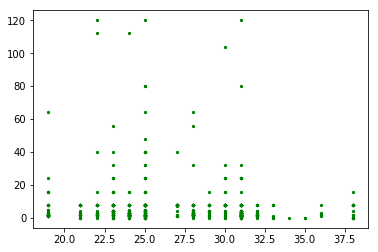

In [9]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter( X[:,0],  y, color='green',s = 5)
plt.show()

### - Scatter plot 2: Transportation expense vs absenteeism

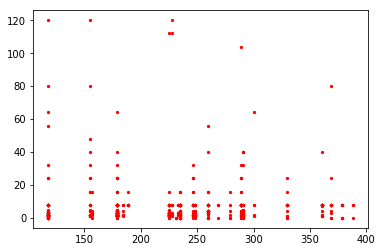

In [10]:
plt.scatter( X[:,1],  y, color='red', s = 5)
plt.show()

### - Scatter plot 3: Age vs absenteeism

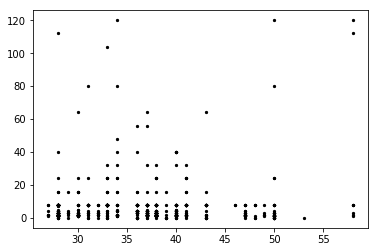

In [11]:
plt.scatter( X[:,2],  y, color='black',s = 5)
plt.show()

# Task 3

Perform PCA and pick enough PCs to explain at least (60%) of the variance. If you need more than two PCs to get to 60% then do so. Check how many PCs are needed to get 60%. Now train your model based the PC features you picked (using the training set) which predicts absenteeism in hours given the features. This should be done using scikit-learn library. Evaluate (using the test-set) the models we discussed in class to see which gives you the best performance (accuracy).
The different models could be for ex- logistic regression or gradient descent.
This task is basically for you to learn about different models, theri accuracy and PCA. There is no right and wrong answer.
### - Standardizing the data

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\henry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35251499, 0.1966637 , 0.14012339, 0.12938822, 0.07859416,
       0.07380223, 0.02850542, 0.00040789])

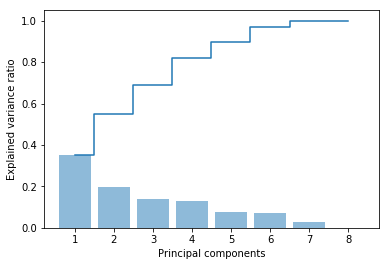

In [14]:
import numpy as np
plt.bar(range(1, 9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 9), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

### - The first three components captured around 70% of the variance
### - Which are bmi, transportation expense and age

In [15]:
X_pca, y_pca = df_abs.iloc[:, :3].values, df_abs.iloc[:, 8].values  #Only put 3 features into training dataset this time.

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=0)

### - Linear Regression

In [16]:
from sklearn import linear_model 

model = linear_model.LinearRegression()

Xsample = X_pca_train
ysample = y_pca_train
model.fit(Xsample, ysample)
print( model.intercept_)
print(model.coef_)

4.080396302221635
[-0.37250801  0.00855261  0.2992429 ]


### - Calculate MSE

In [17]:
from sklearn.metrics import mean_squared_error

yhat = model.predict(X_pca_test)

print(mean_squared_error(y_pca_test,yhat))

# This is the MSE between the real values of y_pca_test and the predicted values derived from X_pca_test.

125.00046654640512


### - Change Model to K-Nearest Neighbors regression / MSE
The MSE from K-Nearest regression is larger than taht we got from a linear regression model. Thus the linear regression model has higher accuracy comppared with K-Nearest regression.

In [18]:
from sklearn import neighbors
model2 = neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the model
model2.fit(Xsample, ysample)
yhat2 = model2.predict(X_pca_test)
print(mean_squared_error(y_pca_test,yhat2))

148.72972972972974


### - Logistic Regression model
We define that if 'Absenteeism time in hours' >= 1, then this person is classified as 1, which means likely to be absent. If 'Absenteeism time in hours'= 0, then this person would be classified as 0 which means no absence.

In [19]:
df_abs.loc[df['Absenteeism time in hours'] >= 1, 'logis'] = 1
df_abs.loc[df['Absenteeism time in hours'] == 0, 'logis'] = 0

C:\Users\henry\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\henry\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
df_abs.tail()

,Body mass index,Transportation expense,Age,Reason for absence,Distance from Residence to Work,Service time,Weight,Height,Absenteeism time in hours,logis
735,30,289,33,14,36,13,90,172,8,1.0
736,29,235,37,11,11,14,88,172,4,1.0
737,34,118,40,0,14,13,98,170,0,0.0
738,35,231,39,0,35,14,100,170,0,0.0
739,25,179,53,0,45,14,77,175,0,0.0


In [21]:
from sklearn.model_selection import train_test_split

X, y = df_abs.iloc[:, :8].values, df_abs.iloc[:, 9].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\henry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=100.0, random_state=0) # we will see the parameter C below   change C
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
pred = []

for i in range(30):
    pred.append(lr.predict_proba(X_test_std[i, :8].reshape(1, -1)))

print(np.around(pred,decimals=2)) # print only 2 decimal places

[[[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.46 0.54]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.   1.  ]]

 [[0.03 0.97]]

 [[0.   1.  ]]

 [[0.02 0.98]]

 [[0.   1.  ]]

 [[0.1  0.9 ]]

 [[0.11 0.89]]

 [[0.47 0.53]]

 [[0.08 0.92]]

 [[0.   1.  ]]]


In [34]:
X_test_std

array([[ 1.23820737,  0.38700822,  1.75342725, ...,  0.35445697,
         0.57356185, -1.23985036],
       [-0.87317623,  0.35675084,  0.78511668, ...,  0.80065067,
        -0.94106002, -0.32183651],
       [ 1.00360919, -0.65687132,  0.30096139, ...,  1.24684438,
         0.81271267, -0.32183651],
       ...,
       [-1.34237258,  2.35373778, -0.0218088 , ..., -0.31483359,
        -1.10049391,  0.41257456],
       [-0.40397987, -1.01995985, -0.34457899, ...,  0.35445697,
         1.29101432,  4.45183549],
       [-0.40397987, -0.50558443, -0.50596408, ...,  0.13136012,
        -0.78162614, -0.87264482]])

In [40]:
lr.predict_proba(X_test_std[:,:8])

array([[1.49125187e-05, 9.99985087e-01],
       [1.79520102e-03, 9.98204799e-01],
       [1.89699743e-05, 9.99981030e-01],
       [4.72799386e-03, 9.95272006e-01],
       [1.03279522e-04, 9.99896720e-01],
       [2.04936584e-06, 9.99997951e-01],
       [3.40456732e-04, 9.99659543e-01],
       [1.64311698e-05, 9.99983569e-01],
       [1.99514749e-06, 9.99998005e-01],
       [8.40458807e-08, 9.99999916e-01],
       [1.73204527e-05, 9.99982680e-01],
       [9.95938237e-06, 9.99990041e-01],
       [4.55546667e-01, 5.44453333e-01],
       [7.88431823e-06, 9.99992116e-01],
       [2.55449080e-05, 9.99974455e-01],
       [1.68940825e-06, 9.99998311e-01],
       [3.64487729e-06, 9.99996355e-01],
       [9.28555490e-07, 9.99999071e-01],
       [2.06398690e-04, 9.99793601e-01],
       [1.68940825e-06, 9.99998311e-01],
       [1.18372461e-03, 9.98816275e-01],
       [2.80722126e-02, 9.71927787e-01],
       [1.68940825e-06, 9.99998311e-01],
       [1.71393979e-02, 9.82860602e-01],
       [3.099069

In [56]:
lr.predict_proba(X_test_std[:,:8])[:,1]

array([0.99998509, 0.9982048 , 0.99998103, 0.99527201, 0.99989672,
       0.99999795, 0.99965954, 0.99998357, 0.999998  , 0.99999992,
       0.99998268, 0.99999004, 0.54445333, 0.99999212, 0.99997446,
       0.99999831, 0.99999636, 0.99999907, 0.9997936 , 0.99999831,
       0.99881628, 0.97192779, 0.99999831, 0.9828606 , 0.99969009,
       0.89692254, 0.88995123, 0.53453859, 0.91912072, 0.999998  ,
       0.99999884, 0.99999921, 0.99991298, 0.9884426 , 0.99928498,
       0.99998103, 0.99989123, 0.99907518, 0.99760929, 0.98535032,
       0.99989914, 0.54445333, 0.99965954, 0.99999831, 0.99999748,
       0.99999748, 0.999998  , 0.99989914, 0.99999427, 0.99989123,
       0.99994746, 0.99999791, 0.99999907, 0.99994796, 0.99997257,
       0.9982048 , 0.99999404, 0.99999237, 0.99796131, 0.99999848,
       0.71706497, 0.99998595, 0.99907518, 0.99999848, 0.99989914,
       0.99965954, 0.99997446, 0.54445333, 0.99999985, 0.99998103,
       0.99981415, 0.99989914, 0.99993616, 0.9993584 , 0.99999

In [58]:
np.array([1 if x>0.5 else 0 for x in lr.predict_proba(X_test_std)[:,1]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

The prediction results from the test dataset show that some people are more likely to be absent with result [0, 1]. It also shows for some people their chance 

## Explanation on what features you finally used, what all ML models you tried and what results you got and what was the inference.

#### - We used the three features that constitutes over 70% of variance, namely, bmi, transportation expense and age.

# Task 4

The third task is to do clustering(using k-means). For this we will use the highly correlated features to cluster people into different absent reasons (The twelve reasons numbered between 0-28 and the value is given in the reason for absenteeism column). 
What you can do is pick a feature and plot the reason for absenteeism with respect to the feature. Then this will give you insight how many clusters are there, then do the clustering given the similar k that you had as in insight.
This task is basically for you to learn about what things are, how clustering works, why is it useful. There is no right and wrong answer.

In [28]:
from sklearn.cluster import KMeans

colors = ['#aec7e8','#ff7f0e','#ffbb78','#2ca02c','#98df8a',
          '#d62728','#ff9896', '#9467bd', '#c5b0d5', '#8c564b',
          '#c49c94','#e377c2',
          '#d62728','#ff9896', '#9467bd', '#c5b0d5', '#8c564b',
          '#c49c94','#e377c2']
         
mkrs = ['o','v','^','<','>','1','2','3','4','8','p','+','x','d']

Trying out different clustering combinations...

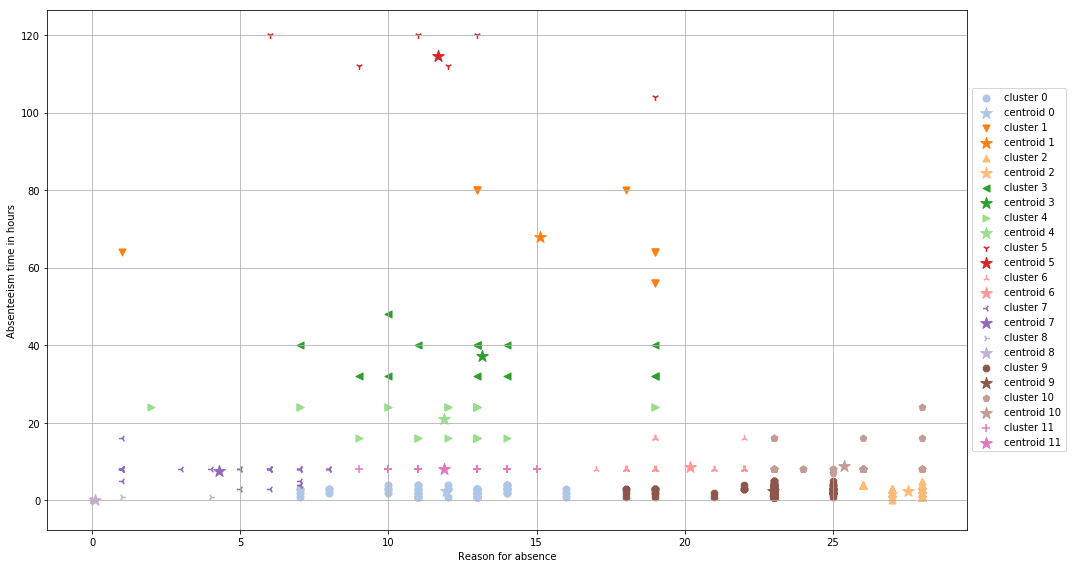

In [29]:
# ['Body mass index', 'Transportation expense', 'Age',
# 'Reason for absence', 'Distance from Residence to Work', 'Service time',
# 'Weight', 'Height', 'Absenteeism time in hours']
x,y=3,8 
# 3,8 = 'reason for absence' and 'Absenteeism time in hours'
c_s=12

CX = df_abs.iloc[:,[x,y]].values

plt.figure(figsize=(15,8))
plt.xlabel(df_abs.columns[x])
plt.ylabel(df_abs.columns[y])

km = KMeans(n_clusters=c_s, # how many clusters
            init='k-means++', # try 'k-means++' instead of 'random'
            n_init=10,    # 10 runs of the k-means algorithm, each run starts with a different
                          # set of 3 centroids; choose the one that has the lowest SSE
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)
y_km = km.fit_predict(CX)
    
for _ in range(c_s):
    plt.scatter(CX[y_km == _, 0],
                CX[y_km == _, 1],
                s=50,
                c=colors[_], 
                marker=mkrs[_],
                label='cluster {}'.format(_))
    plt.scatter(km.cluster_centers_[_, 0],
                km.cluster_centers_[_, 1],
                s=150,
                marker='*',
                c=colors[_],
                label='centroid {}'.format(_))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
plt.show()

In [30]:
c_s=12 # num of clusters

# examine all the features other than the 'reason' feature
CX = df_abs.iloc[:,[0,1,2,4,5,6,7,8]].values


km = KMeans(n_clusters=c_s, # how many clusters
            init='k-means++', # try 'k-means++' instead of 'random'
            n_init=10,    # 10 runs of the k-means algorithm, each run starts with a different
                          # set of 3 centroids; choose the one that has the lowest SSE
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)
y_km = km.fit_predict(CX)

for _ in range(c_s):
    df_tmp=df_abs[y_km==_]['Reason for absence'].unique()
    print('cluster',_+1,'reasons: ',df_tmp)


cluster 1 reasons:  [ 0 23 19 27 13  1  5 26 28  7 11 25 18 14  9  8 10]
cluster 2 reasons:  [26  7 23 18 24 11 14  0 22 28  6 19 13 12  3 15  4 10]
cluster 3 reasons:  [23 11 21 18 13 12 26 28  6 27 10  0  5 25]
cluster 4 reasons:  [14 19  1 13 10 18  9  4 26 23 28  0 25  6]
cluster 5 reasons:  [22 13 25 23  0 11  1 19  8 10 26 28 14  7]
cluster 6 reasons:  [22 23 18 28 19 26 14  7  0 13 25 21  1 10 11]
cluster 7 reasons:  [ 0 23 18 28 13 27 25 11 19 12  7 10  6  1 14 16 22]
cluster 8 reasons:  [11 23 21 22 18 19 17 13  8  7  6  1 25 12 27 16 10]
cluster 9 reasons:  [19 28 23 10  6 18  1 13 12 25  0 11]
cluster 10 reasons:  [23  1 11 28 22  0 19 26 13 10 15]
cluster 11 reasons:  [11 13  9 18 12 19  6]
cluster 12 reasons:  [10 18 23  0 26  1 13 11 25  2]


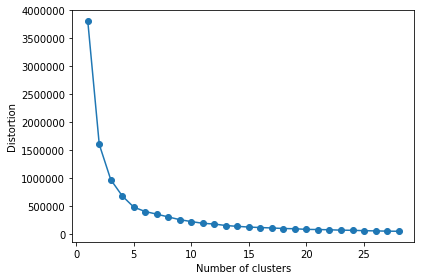

In [31]:
distortions = []
for i in range(1, 29):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(CX) # includes all the features other than reason for absense
    distortions.append(km.inertia_)
plt.plot(range(1, 29), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Explanation on how you did the clustering and how k-means helped. What results you got and their inference. 

We tested clustering over the different features (without reasons for absence) of each individual record. From the distortion chart, we found when number of clusters is 5, we reach the "elbow" point. We think this explains as there are 5 main groups of individual records in the dataset. However no matter how many clustering groups we choose, we always see overlapping reasons in the result clusters. We didn't see clear connection between reasons of absence and different features of each individuals (which construct different clusters) within each cluster group. We think this can be explained as we should not predict people's reason for absence based on individual profile records.

In [32]:
c_s=5 # num of clusters
level=len(df_abs)//(c_s*15)

# examine all the features other than the 'reason' feature
CX = df_abs.iloc[:,[0,1,2,4,5,6,7,8]].values


km = KMeans(n_clusters=c_s, # how many clusters
            init='k-means++', # try 'k-means++' instead of 'random'
            n_init=10,    # 10 runs of the k-means algorithm, each run starts with a different
                          # set of 3 centroids; choose the one that has the lowest SSE
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)
y_km = km.fit_predict(CX)

for _ in range(c_s):
#     df_tmp=df_abs[y_km==_]['Reason for absence'].unique()
    df_tmp=df_abs[y_km==_]
    df_tmp=df_tmp.groupby('Reason for absence').count()
    main_reasons=list(df_tmp[df_tmp.Age>level].index) # main reasons that have more than 'level' of records
    print('cluster',_+1,'reasons: ',main_reasons)


cluster 1 reasons:  [11, 13, 23, 25, 27, 28]
cluster 2 reasons:  [0, 19, 23, 26, 28]
cluster 3 reasons:  [0, 13, 19, 23, 25, 26, 28]
cluster 4 reasons:  [23, 27, 28]
cluster 5 reasons:  [22, 23]
